<a href="https://colab.research.google.com/github/celestineudim/FWImodel/blob/main/Canadian_Fire_Weather_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Main Libs**

In [1]:
#Importing main Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **EDA**

In [52]:
#Importing Data
df = pd.read_csv('/content/drive/MyDrive/Celestine Monday Data Request_Slave Lake Area_2006_2022.csv', 
                 index_col='weather_date', parse_dates=True)
df.describe()

,dry_bulb_temperature,wet_bulb_temperature,relative_humidity,wind_speed_kmh,wind_gust_kmh,rain_mm,dew_point,fine_fuel_moisture_code,initial_spread_index,duff_moisture_code,build_up_index,drought_code,daily_severity_rating,fire_weather_index
count,72999.000000,32315.000000,72570.000000,72999.000000,15175.000000,72999.000000,72570.000000,72999.000000,72999.000000,72999.000000,72999.000000,72999.000000,72999.000000,72999.000000
mean,15.084532,11.477209,59.244264,10.703338,34.022867,0.480760,6.682475,71.149879,3.363989,20.698005,32.390735,261.312088,1.663449,7.201392
std,6.966751,4.058042,20.178515,6.372315,9.321100,1.971333,6.181549,22.268971,3.803159,17.235472,24.114669,131.407687,3.093012,8.310268
min,-19.500000,0.000000,8.000000,0.000000,16.000000,0.000000,-27.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
25%,11.200000,9.000000,44.000000,6.000000,28.000000,0.000000,3.000000,60.800000,0.700000,8.400000,14.600000,164.900000,0.010000,0.500000
50%,16.000000,12.000000,56.260000,10.000000,33.000000,0.000000,7.700000,81.200000,2.200000,16.100000,26.800000,253.000000,0.360000,4.300000
75%,20.000000,14.500000,73.000000,14.000000,39.000000,0.000000,11.000000,87.200000,5.000000,28.100000,44.400000,349.300000,2.030000,11.400000
max,37.100000,24.500000,100.000000,78.000000,127.000000,72.200000,25.000000,96.600000,118.200000,166.500000,199.500000,719.700000,78.620000,90.200000


In [3]:
df.shape

(72999, 17)

In [5]:
#Looking up missing value 
df.isnull().sum()

station_id                     0
name                           0
dry_bulb_temperature           0
wet_bulb_temperature       40684
relative_humidity            429
wind_speed_kmh                 0
wind_gust_kmh              57824
rain_mm                        0
dew_point                    429
fine_fuel_moisture_code        0
initial_spread_index           0
duff_moisture_code             0
build_up_index                 0
drought_code                   0
daily_severity_rating          0
fire_weather_index             0
c_wnd_drct_type                0
dtype: int64

In [47]:
#Dropping colums with too many missing datapoints
fire_df =df.drop(['station_id','name','wet_bulb_temperature','wind_gust_kmh'], axis=1)

(72999, 13)

In [7]:
#Reviewing missing data
fire_df.isnull().sum()

dry_bulb_temperature         0
relative_humidity          429
wind_speed_kmh               0
rain_mm                      0
dew_point                  429
fine_fuel_moisture_code      0
initial_spread_index         0
duff_moisture_code           0
build_up_index               0
drought_code                 0
daily_severity_rating        0
fire_weather_index           0
c_wnd_drct_type              0
dtype: int64

In [8]:
#Dropping all rows with missing data
fire_df.dropna(axis=0, inplace=True)
fire_df.shape

Text(0.5, 1.0, 'Time Series Plot of FWI')

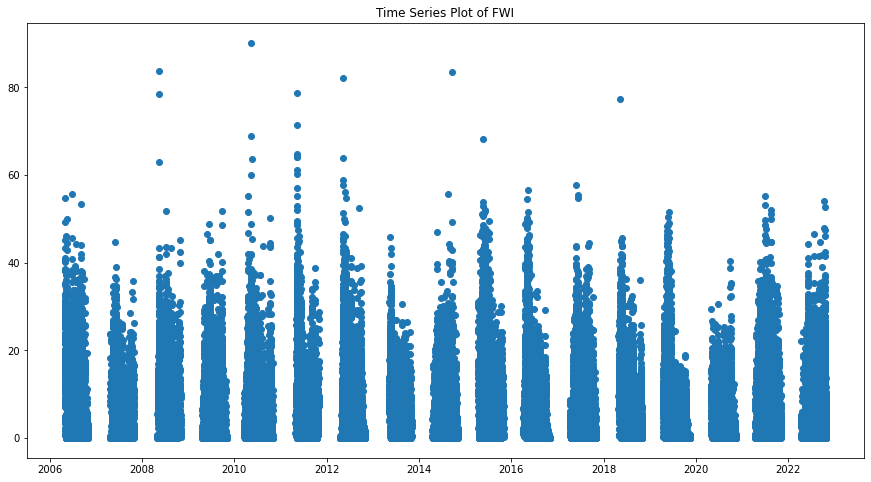

In [9]:
#Visualising FWI
plt.subplots(figsize=(15,8))
plt.scatter(fire_df.index,fire_df['fire_weather_index'])
plt.title('Time Series Plot of FWI')

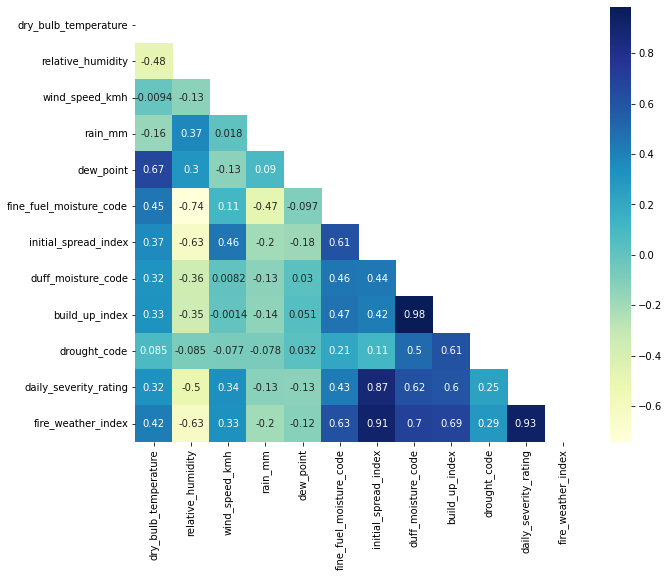

In [10]:
#Corelation heatmap
correlation = fire_df.corr()
mask = np.triu(np.ones_like(correlation))

plt.subplots(figsize=(10, 8))
sns.heatmap (correlation, annot=True, cmap="YlGnBu", mask=mask)

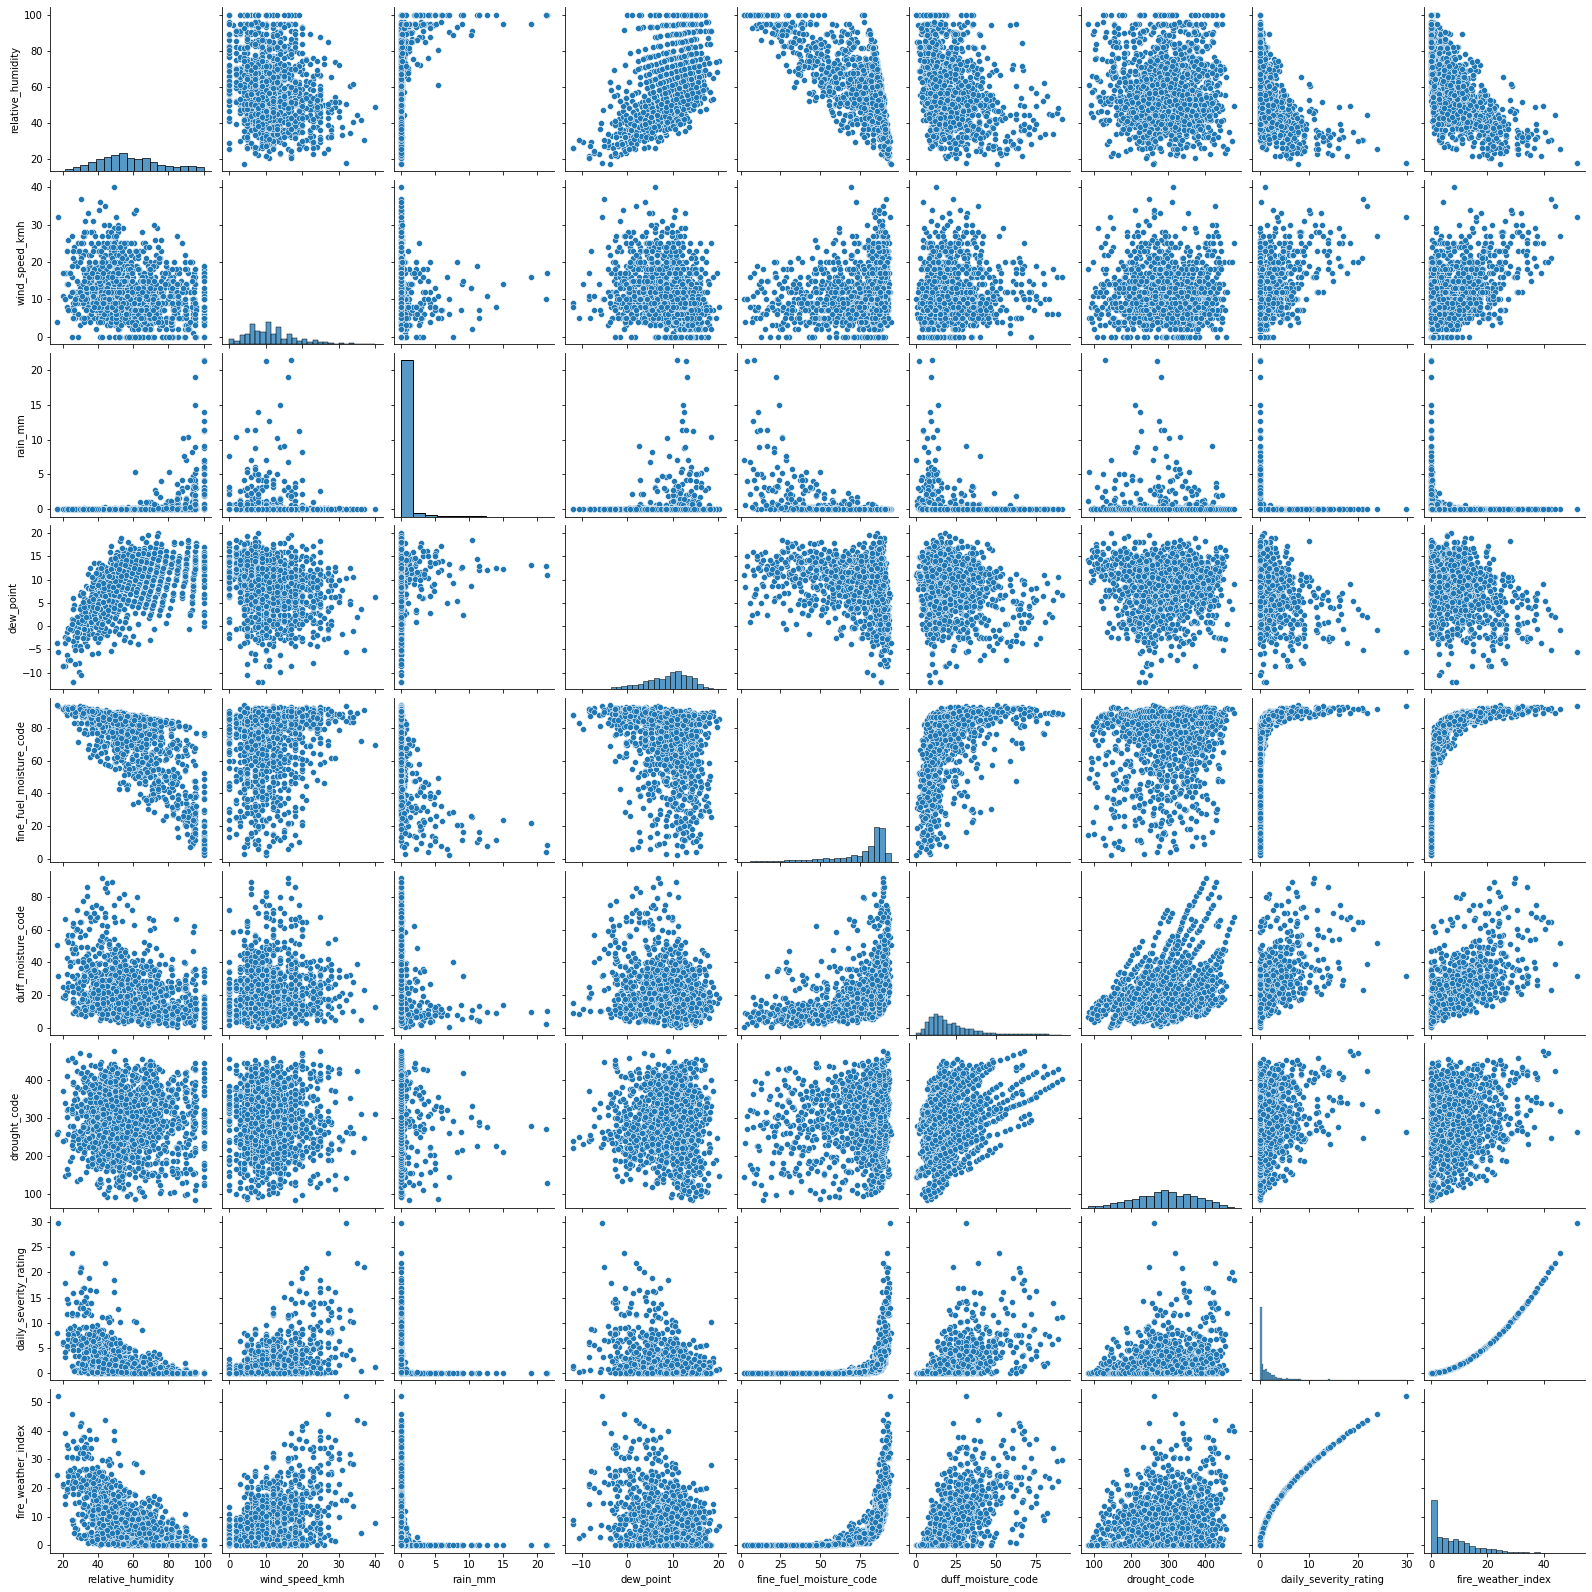

In [11]:
#Visualising pair-plot of all features

col1 = ['relative_humidity', 'wind_speed_kmh','rain_mm', 'dew_point', 'fine_fuel_moisture_code',
        'duff_moisture_code','drought_code', 'daily_severity_rating', 'fire_weather_index']

sns.pairplot(fire_df[col1].iloc[:1400])

In [12]:
#VIF Function
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [13]:
fire_df.columns

Index(['dry_bulb_temperature', 'relative_humidity', 'wind_speed_kmh',
       'rain_mm', 'dew_point', 'fine_fuel_moisture_code',
       'initial_spread_index', 'duff_moisture_code', 'build_up_index',
       'drought_code', 'daily_severity_rating', 'fire_weather_index',
       'c_wnd_drct_type'],
      dtype='object')

In [ ]:
col = ['relative_humidity', 'wind_speed_kmh','rain_mm', 'dew_point', 'fine_fuel_moisture_code',
        'duff_moisture_code','drought_code','fire_weather_index']

calculate_vif(fire_df, col)

## **Data Allocation**

In [15]:
fire_df[['dry_bulb_temperature','fire_weather_index']].head(4)

,dry_bulb_temperature,fire_weather_index
weather_date,,
2006-05-04 12:00:00,15.0,18.7
2006-05-05 12:00:00,21.0,30.8
2006-05-06 12:00:00,18.5,32.8
2006-05-07 12:00:00,16.0,34.2


In [16]:
df_fwi=fire_df['fire_weather_index']
df_fwi = df_fwi.shift(-1)
df_shift = fire_df
df_shift['FWI_tomorrow'] = df_fwi
df_shift.dropna(axis=0, inplace=True)

In [17]:
df_shift[['dry_bulb_temperature', 'FWI_tomorrow','fire_weather_index']].head(4)

,dry_bulb_temperature,FWI_tomorrow,fire_weather_index
weather_date,,,
2006-05-04 12:00:00,15.0,30.8,18.7
2006-05-05 12:00:00,21.0,32.8,30.8
2006-05-06 12:00:00,18.5,34.2,32.8
2006-05-07 12:00:00,16.0,32.2,34.2


In [18]:
x = df_shift[['wind_speed_kmh','rain_mm', 'dew_point', 'dry_bulb_temperature',
              'fine_fuel_moisture_code','fire_weather_index']]
y = df_shift['FWI_tomorrow']

from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,shuffle=True, random_state=500)

In [19]:
df_shift.shape

(72569, 14)

In [20]:
#Function to return class of FWI
def classify(y):
  y_int = np.round(y)
  y_class = []
  y_c = pd.DataFrame()

  for i in np.array(y_int):
    if i>=30:
      y_class.append(5)
    elif i>=17 and i<=29:
      y_class.append(4)
    elif i>=9 and i<=16:
      y_class.append(3)
    elif i>=5 and i<=8:
      y_class.append(2)
    elif i>=2 and i<=4:
      y_class.append(1)
    elif i<=1:
      y_class.append(0)
    y_c = pd.DataFrame(y_class)
  return y_c 


## **LGBMR (light gradient-boosting machine)**

### Forcast Model

In [21]:
x = df_shift[['wind_speed_kmh','rain_mm', 'dew_point', 'dry_bulb_temperature',
              'fine_fuel_moisture_code','fire_weather_index']]
y = df_shift['FWI_tomorrow']

from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,shuffle=True, random_state=500)

In [22]:
from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [23]:
model = LGBMRegressor()
results = model.fit (x_train, y_train)
results.score(x_test, y_test)

0.6149695082673192

In [24]:
print('R2 Value: ', metrics.r2_score(y_test,results.predict(x_test)))
print('MAE Value: ', metrics.mean_absolute_error(y_test,results.predict(x_test)))

R2 Value:  0.6149695082673192
MAE Value:  3.295907627622198


In [25]:
cvs = cross_val_score(model,x_train, y_train,cv=3,verbose=2, n_jobs=4)
cvs.mean()

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.7s finished


0.607548962864242

<BarContainer object of 6 artists>

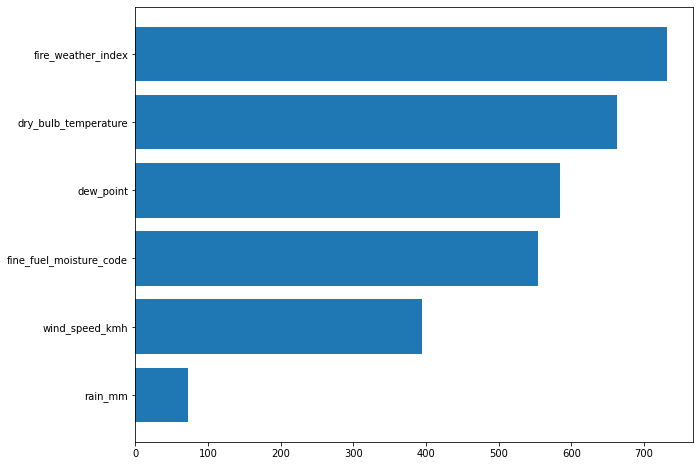

In [26]:
sorted_idx = model.feature_importances_.argsort()
plt.subplots(figsize=(10,8))
plt.barh(x_train.columns[sorted_idx], model.feature_importances_[sorted_idx] )

Text(0.5, 1.0, 'Observed vs Modelled FWI_Tomorrow')

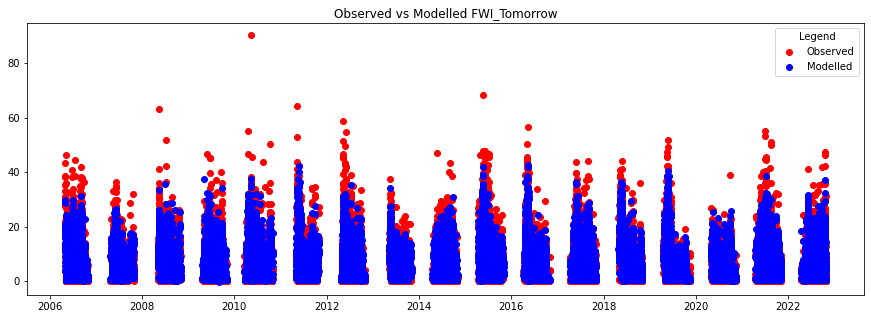

In [27]:
plt.subplots(figsize=(15,5))
plt.scatter(y_test.index, y_test, color='r')
plt.scatter(y_test.index, model.predict(x_test), color='b')
plt.legend(labels=["Observed","Modelled"], title = "Legend")
plt.title("Observed vs Modelled FWI_Tomorrow")

In [28]:
ols_df = pd.DataFrame()
ols_df['Model FWI_Tomorrow'] = model.predict(x_test)
ols_df['Observed FWI_Tomorrow'] = y_test.to_numpy()


fig = px.scatter(ols_df, x="Observed FWI_Tomorrow", y='Model FWI_Tomorrow', trendline="ols", 
                 trendline_color_override="red", width=800, height=800, title= "Observed vs Modelled FWI_Tomorrow")
fig.add_shape(type='line',x0=0,y0=0,x1=60,y1=60,line=dict(color='green',),xref='x',yref='y')
fig.update_yaxes(range=[0, 60], row=1, col=1)
fig.update_xaxes(range=[0, 60], row=1, col=1)


In [29]:
#Classification of FWI_Tomorrow
ob_class = classify(ols_df['Observed FWI_Tomorrow'])
mod_class = classify(ols_df['Model FWI_Tomorrow'])

In [30]:
metrics.accuracy_score(ob_class, mod_class)

0.5268476413577695

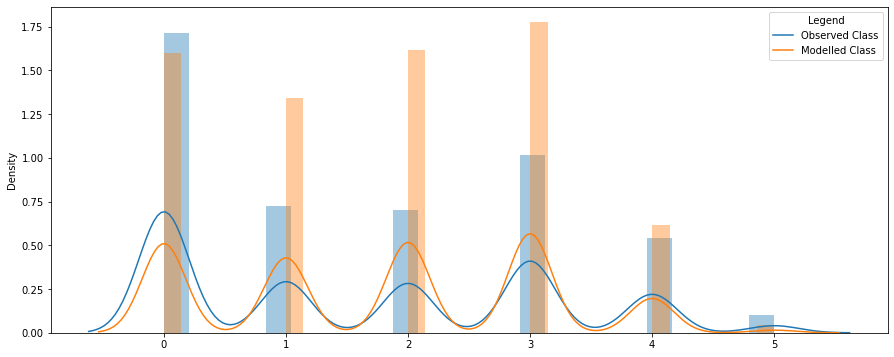

In [31]:
plt.subplots(figsize=(15,6))
sns.distplot(ob_class)
sns.distplot(mod_class)
plt.legend(labels=["Observed Class","Modelled Class"], title = "Legend")

### **Parameter Reduction**

In [32]:
x = df_shift[['wind_speed_kmh','rain_mm', 'dew_point', 'dry_bulb_temperature','fine_fuel_moisture_code']]
y = df_shift['fire_weather_index']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,shuffle=True, random_state=4)

In [33]:
model = LGBMRegressor()
results = model.fit (x_train, y_train)
results.score(x_test, y_test)

0.9010291477702006

In [34]:
print('MAE Value: ', metrics.mean_absolute_error(y_test,results.predict(x_test)))

MAE Value:  1.640090240273009


In [35]:
cvs = cross_val_score(model,x_train, y_train,cv=3,verbose=2, n_jobs=4)
cvs.mean()

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.2s finished


0.8996657803433248

<BarContainer object of 5 artists>

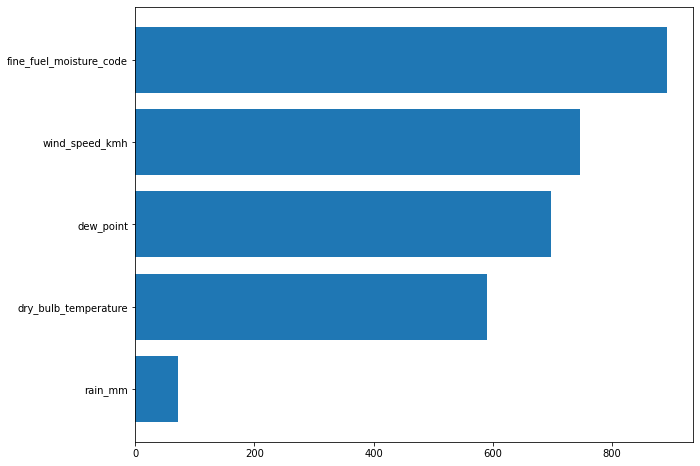

In [36]:
sorted_idx = model.feature_importances_.argsort()
plt.subplots(figsize=(10,8))
plt.barh(x_train.columns[sorted_idx], model.feature_importances_[sorted_idx] )

Text(0.5, 1.0, 'Observed vs Modelled FWI')

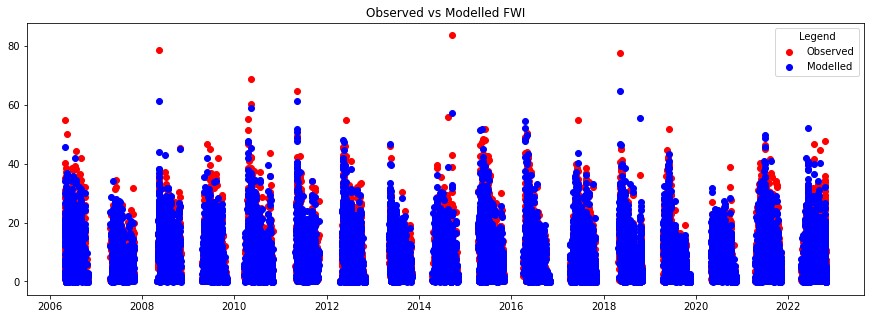

In [37]:
plt.subplots(figsize=(15,5))
plt.scatter(y_test.index, y_test, color='r')
plt.scatter(y_test.index, model.predict(x_test), color='b')
plt.legend(labels=["Observed","Modelled"], title = "Legend")
plt.title("Observed vs Modelled FWI")

In [38]:
ols_df = pd.DataFrame()
ols_df['Model FWI'] = model.predict(x_test)
ols_df['Observed FWI'] = y_test.to_numpy()


fig = px.scatter(ols_df, x="Observed FWI", y='Model FWI', trendline="ols", 
                 trendline_color_override="red", width=800, height=800, title= "Observed vs Modelled FWI")
fig.add_shape(type='line',x0=0,y0=0,x1=80,y1=80,line=dict(color='green',),xref='x',yref='y')
fig.update_yaxes(range=[0, 60], row=1, col=1)
fig.update_xaxes(range=[0, 60], row=1, col=1)


In [39]:
#Classification of FWI_Tomorrow
ob_class = classify(ols_df['Observed FWI'])
mod_class = classify(ols_df['Model FWI'])

In [40]:
metrics.accuracy_score(ob_class, mod_class)

0.7270681181388086

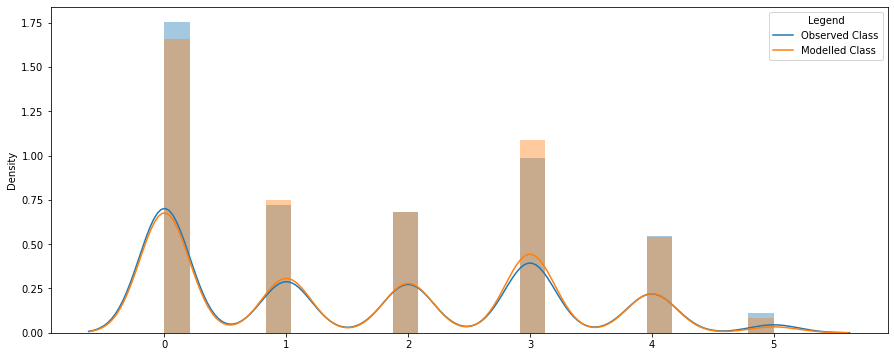

In [41]:
plt.subplots(figsize=(15,6))
sns.distplot(ob_class)
sns.distplot(mod_class)
plt.legend(labels=["Observed Class","Modelled Class"], title = "Legend")

In [42]:
#Sensitivity Analysis

def samodel (wind_speed,rain_mm,dew_point,dry_bulb_temperature,fine_fuel_mc):
  FWI = results.predict([[wind_speed,rain_mm,dew_point,dry_bulb_temperature,fine_fuel_mc]])
  return float(np.round(FWI,3))


In [ ]:
! pip install sensitivity

In [44]:
from sensitivity import SensitivityAnalyzer

sensitivity_dict = {
    'wind_speed': np.linspace(4, 40, 5),
    'rain_mm': np.linspace(1.6, 16, 5),
    'dew_point': np.linspace(11, 110, 5),
    'dry_bulb_temperature': np.linspace(13.3, 133, 5),
    'fine_fuel_mc': np.linspace(57.0, 570, 5),
}

sa = SensitivityAnalyzer(sensitivity_dict, samodel, result_name='FWI',
                         reverse_colors=True, grid_size=7, num_fmt='{:.3f}')

100%|██████████| 3125/3125 [00:04<00:00, 688.76it/s]


In [45]:
sa.df

,wind_speed,rain_mm,dew_point,dry_bulb_temperature,fine_fuel_mc,FWI
0,4,1.6,11.0,13.3,57.0,0.486
1,4,1.6,11.0,13.3,185.25,39.288
2,4,1.6,11.0,13.3,313.5,39.288
3,4,1.6,11.0,13.3,441.75,39.288
4,4,1.6,11.0,13.3,570.0,39.288
...,...,...,...,...,...,...
3120,40,16.0,110.0,133.0,57.0,4.051
3121,40,16.0,110.0,133.0,185.25,69.06
3122,40,16.0,110.0,133.0,313.5,69.06
3123,40,16.0,110.0,133.0,441.75,69.06


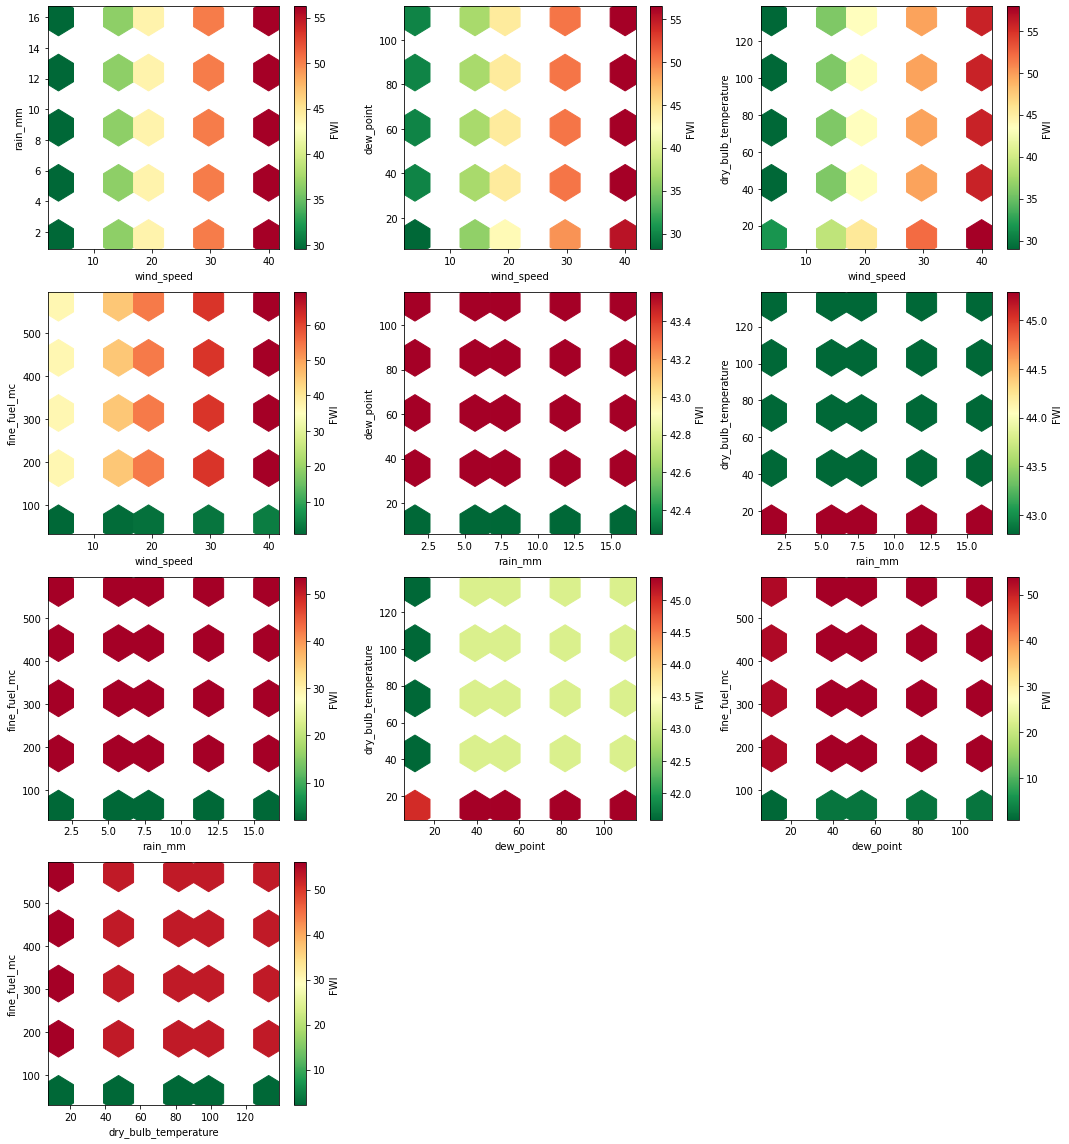

In [46]:
#hex-bin plot and styled DataFrame
plot = sa.plot()
#styled = sa.styled_dfs()